<a href="https://colab.research.google.com/github/dp1500/2byteCode-Business-Analysis/blob/main/2ByteCode_users_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# df = pd.read_csv("/content/2bytecode.csv")

In [ ]:
# import pandas as pd
# import json

# # Load the JSON data from a file (replace 'input.json' with your file path)
# with open('data.json', 'r') as json_file:
#     data = json.load(json_file)

# # Extract the list of user objects from the "Users" object
# user_list = data['Users']['Users']

# # Convert the list of user objects to a Pandas DataFrame
# df = pd.DataFrame(user_list)

# # Save the DataFrame to a CSV file (replace 'output.csv' with your desired file path)
# df.to_csv('2ByteCodeData.csv', index=False)

# print(f"JSON data converted to CSV and saved as 'output.csv'.")


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## reading for all dates


In [10]:
# Read the CSV file

df = pd.read_csv('/content/new_data.csv', skiprows=range(1, 37))

df.head()

,uid,current_scrn,next_scrn,time_spent,time,extra
0,Saurabhkumar727740@gmail.com,FLUTTER_WIDGET,NaN,6,1.697548e+12,NaN
1,Saurabhkumar727740@gmail.com,FLUTTER_DOCUMENT,FLUTTER_WIDGET,5,1.697548e+12,text
2,Saurabhkumar727740@gmail.com,FLUTTER_WIDGET,NaN,2,1.697548e+12,NaN
3,Saurabhkumar727740@gmail.com,FLUTTER_DOCUMENT,FLUTTER_WIDGET,5,1.697548e+12,button
4,Saurabhkumar727740@gmail.com,FLUTTER_WIDGET,DOCS_READING,21,1.697548e+12,Switch Widget


In [ ]:
# # Convert time data in place
# def milliseconds_to_hhmm(milliseconds):
#     if pd.isna(milliseconds):
#         return np.nan

#     # Convert milliseconds to datetime
#     datetime_obj = pd.to_datetime(milliseconds, unit='ms')
#     return datetime_obj.strftime('%H:%M')

# df['time'] = df['time'].apply(milliseconds_to_hhmm)

In [11]:


# Convert time data in place
def milliseconds_to_datetime(milliseconds):
    if pd.isna(milliseconds):
        return np.nan

    # Convert milliseconds to datetime
    datetime_obj = pd.to_datetime(milliseconds, unit='ms')
    return datetime_obj

# Extracting both date and time
df['datetime'] = df['time'].apply(milliseconds_to_datetime)
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.strftime('%H:%M')


## Taking dates after sept 2

In [ ]:
import pandas as pd

# # Loading the dataset, skipping first 36 rows
# df = pd.read_csv('/content/new_data.csv', skiprows=range(1, 37))

# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Filter rows based on the date
df = df[df['date'] >= '2023-12-01']

df.head()


,uid,current_scrn,next_scrn,time_spent,time,extra,datetime,date
35818,brightpinokkio@gmail.com,HOME,FLUTTER_DOCUMENT,3,00:04,NaN,2023-12-01 00:04:57.411000064,2023-12-01
35819,brightpinokkio@gmail.com,FLUTTER_DOCUMENT,FLUTTER_WIDGET,6,00:05,navigation,2023-12-01 00:05:03.816999936,2023-12-01
35820,brightpinokkio@gmail.com,FLUTTER_WIDGET,NaN,4,00:05,NaN,2023-12-01 00:05:08.003000064,2023-12-01
35821,brightpinokkio@gmail.com,FLUTTER_DOCUMENT,FLUTTER_WIDGET,6,00:05,layout,2023-12-01 00:05:10.527000064,2023-12-01
35822,brightpinokkio@gmail.com,FLUTTER_WIDGET,NaN,4,00:05,NaN,2023-12-01 00:05:15.468999936,2023-12-01


In [12]:
len(df)

59972

In [ ]:
df.tail()

,uid,current_scrn,next_scrn,time_spent,time,extra,datetime,date
59967,abdulraufnaheem@gmail.com,QUIZ_ANSWER_SCR,NaN,25,14:05,NaN,2024-01-02 14:05:46.888000000,2024-01-02
59968,abdulraufnaheem@gmail.com,QUIZ,INSTRUCTION_SCR,5,14:06,0,2024-01-02 14:06:01.623000064,2024-01-02
59969,abdulraufnaheem@gmail.com,INSTRUCTION_SCR,QUIZ_QUES_SCR,15,14:06,Quiz : Beginner III,2024-01-02 14:06:16.723000064,2024-01-02
59970,abdulraufnaheem@gmail.com,QUIZ_QUES_SCR,QUIZ_RESULT,98,14:07,Won,2024-01-02 14:07:55.358000128,2024-01-02
59971,abdulraufnaheem@gmail.com,QUIZ_RESULT,NaN,19,14:08,NaN,2024-01-02 14:08:14.751000064,2024-01-02


In [ ]:
df["extra"].unique()

In [ ]:
len(df)

24154

# Creating new dataframe for forecasting

In [19]:
import pandas as pd

# Assuming df is your dataset DataFrame

# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date, day of the week, week number of the month, month of the year, and week of the month
df['date'] = df['datetime'].dt.date
df['day_of_week'] = df['datetime'].dt.day_name()
df['week_number_of_month'] = df['datetime'].dt.isocalendar().week
df['month_of_year'] = df['datetime'].dt.month
df['week_of_month'] = (df['datetime'].dt.day - 1) // 7 + 1

# Calculate cumulative users
df['cumulative_users'] = df.groupby('date').cumcount() + 1

# Calculate daily active users
daily_active_users = df.groupby('date')['uid'].nunique().reset_index()
daily_active_users.columns = ['date', 'daily_active_users']

# Calculate monthly active users
monthly_active_users = df.groupby('month_of_year')['uid'].nunique().reset_index()
monthly_active_users.columns = ['month_of_year', 'monthly_active_users']

# Calculate new users
new_users = df.groupby('date')['uid'].nunique().reset_index()
new_users.columns = ['date', 'new_users']

# Calculate average session duration for each day
average_session_duration_df = df.groupby('date')['time_spent'].mean().reset_index()
average_session_duration_df.columns = ['date', 'average_session_duration']

# Calculate session frequency (Assuming session frequency is calculated as the number of sessions per day)
session_frequency = df.groupby('date').size().reset_index(name='session_frequency')

# Calculate screen views per session (Assuming screen views per session is the same as the number of records per session)
screen_views_per_session = df.groupby('date').size().reset_index(name='screen_views_per_session')

# Calculate average stickiness (Assuming stickiness is calculated as the ratio of daily active users to total users)
average_stickiness = pd.merge(daily_active_users, df.groupby('date')['cumulative_users'].max().reset_index(), on='date')
average_stickiness['average_stickiness'] = average_stickiness['daily_active_users'] / average_stickiness['cumulative_users']
average_stickiness = average_stickiness[['date', 'average_stickiness']]

# Add 'month_of_year' column to the 'daily_active_users' DataFrame by extracting it from the 'date' column
daily_active_users['month_of_year'] = pd.to_datetime(daily_active_users['date']).dt.month

# Merge all metrics into a new DataFrame based on 'month_of_year'
new_df = pd.merge(daily_active_users, monthly_active_users, on='month_of_year')
new_df = pd.merge(new_df, new_users, on='date')
new_df = pd.merge(new_df, average_session_duration_df, on='date')
new_df = pd.merge(new_df, session_frequency, on='date')
new_df = pd.merge(new_df, screen_views_per_session, on='date')
new_df = pd.merge(new_df, average_stickiness, on='date')


# Add additional date-related columns
new_df['day_of_week'] = df['day_of_week'].iloc[0]  # Assuming day of the week is the same for all rows
new_df['week_number_of_month'] = df['week_number_of_month'].iloc[0]  # Assuming week number of the month is the same for all rows
new_df['week_of_month'] = df['week_of_month'].iloc[0]  # Assuming week of the month is the same for all rows

# Display the new DataFrame
print(new_df)


          date  daily_active_users  month_of_year  monthly_active_users  \
0   2023-10-16                   1             10                   541   
1   2023-10-17                  26             10                   541   
2   2023-10-18                 124             10                   541   
3   2023-10-19                  76             10                   541   
4   2023-10-20                  55             10                   541   
..         ...                 ...            ...                   ...   
74  2023-12-29                  41             12                   707   
75  2023-12-30                  44             12                   707   
76  2023-12-31                  46             12                   707   
77  2024-01-01                  56              1                    77   
78  2024-01-02                  34              1                    77   

    new_users  average_session_duration  session_frequency  \
0           1                 67.8000

In [28]:
# Calculate the cumulative sum of users
new_df['cumulative_users'] = new_df['daily_active_users'].cumsum()
new_df


,date,daily_active_users,month_of_year,monthly_active_users,new_users,average_session_duration,session_frequency,screen_views_per_session,average_stickiness,day_of_week,week_number_of_month,week_of_month,cumulative_users
0,2023-10-16,1,10,541,1,67.800000,10,10,0.100000,Tuesday,42,3,1
1,2023-10-17,26,10,541,26,16.055072,345,345,0.075362,Tuesday,42,3,27
2,2023-10-18,124,10,541,124,22.704011,1446,1446,0.085754,Tuesday,42,3,151
3,2023-10-19,76,10,541,76,23.628571,770,770,0.098701,Tuesday,42,3,227
4,2023-10-20,55,10,541,55,21.351770,452,452,0.121681,Tuesday,42,3,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023-12-29,41,12,707,41,16.969543,394,394,0.104061,Tuesday,42,3,4181
75,2023-12-30,44,12,707,44,19.869693,683,683,0.064422,Tuesday,42,3,4225
76,2023-12-31,46,12,707,46,31.831658,398,398,0.115578,Tuesday,42,3,4271
77,2024-01-01,56,1,77,56,19.602854,841,841,0.066587,Tuesday,42,3,4327


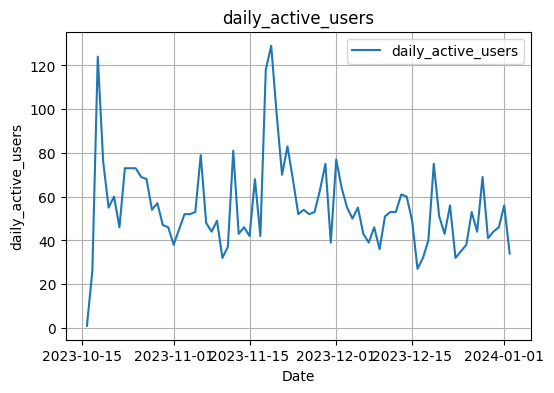

In [37]:


# Plot a line graph
new_df.plot(x='date', y='daily_active_users', kind='line', figsize=(6, 4))
plt.title('daily_active_users')
plt.xlabel('Date')
plt.ylabel('daily_active_users')
plt.grid(True)
plt.show()



<Axes: >

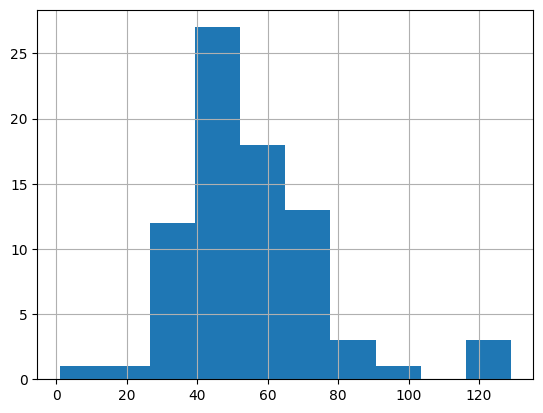

In [38]:
new_df['daily_active_users'].hist()

In [ ]:
# Group by date and screen to calculate total screen time for each screen on each day
screen_time_per_day = df.groupby(['date', 'current_scrn'])['time_spent'].sum().unstack()

# Fill missing values with 0 (for screens not present on certain days)
screen_time_per_day = screen_time_per_day.fillna(0)

# Merge screen time columns into new_df based on the date
new_df = pd.merge(new_df, screen_time_per_day, on='date', how='left')

new_df


## creating line graph for each screens, as in screen time for day on day

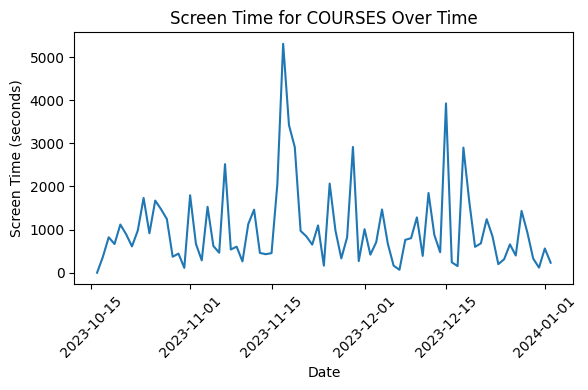

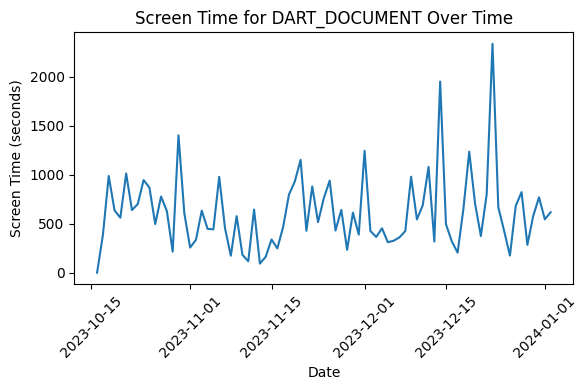

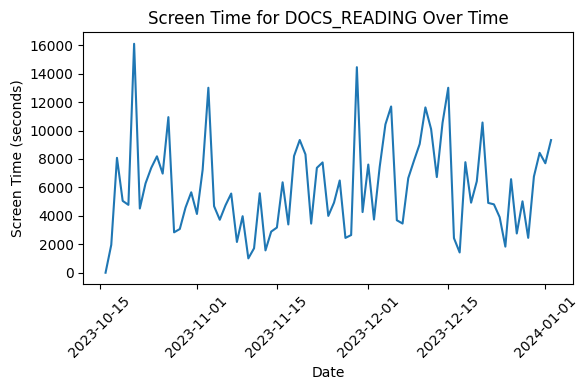

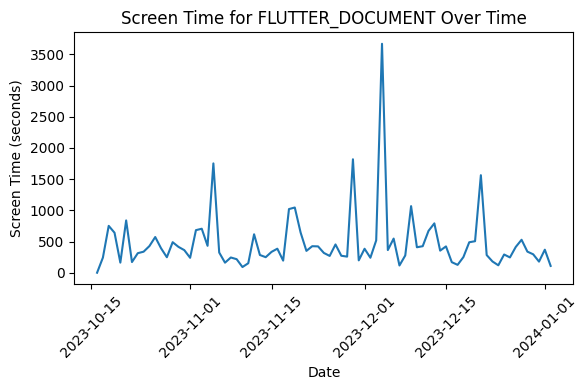

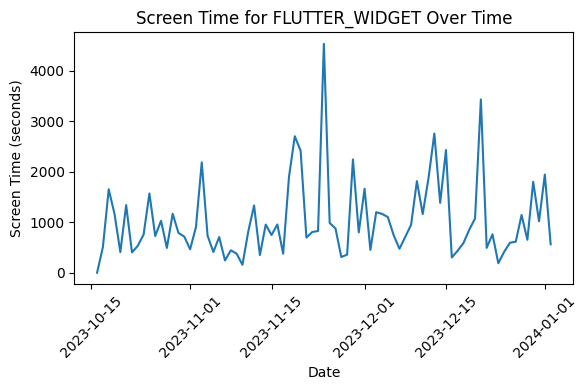

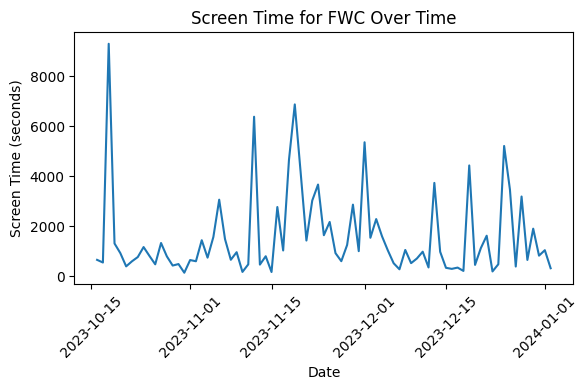

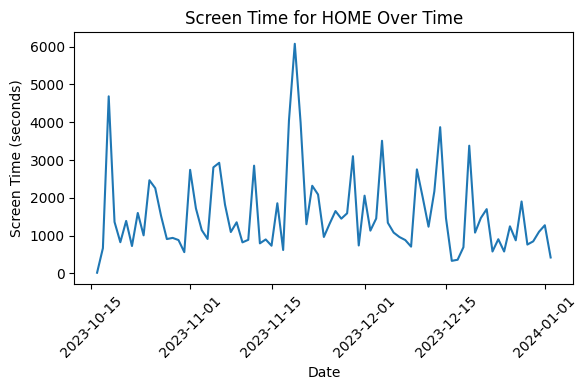

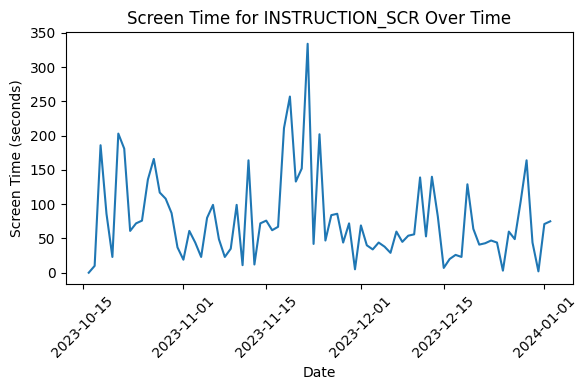

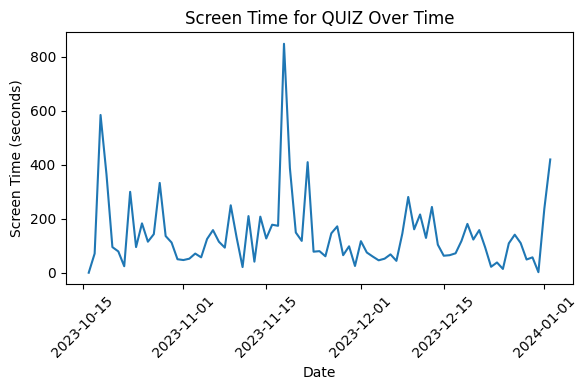

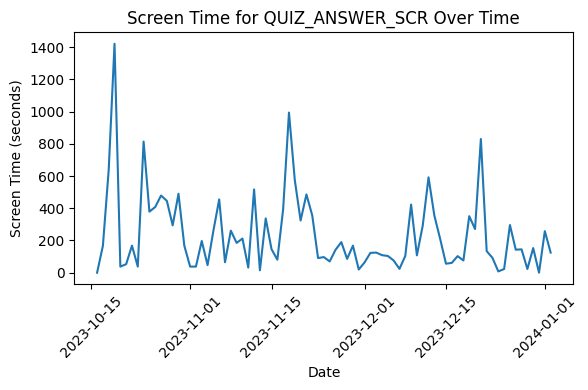

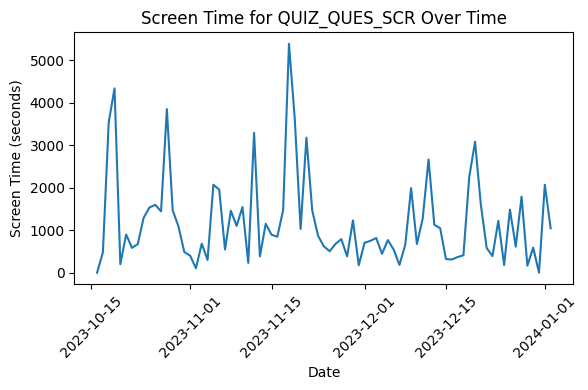

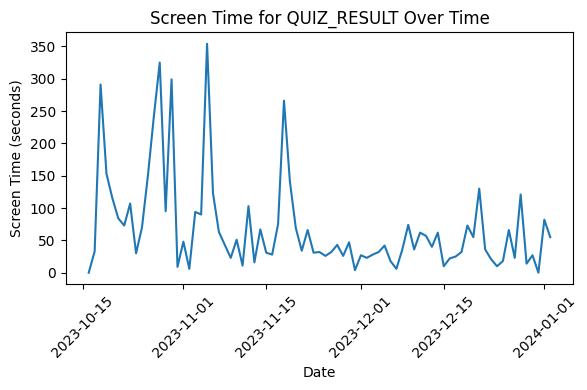

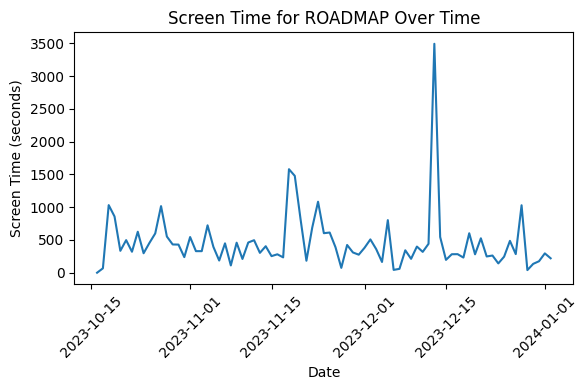

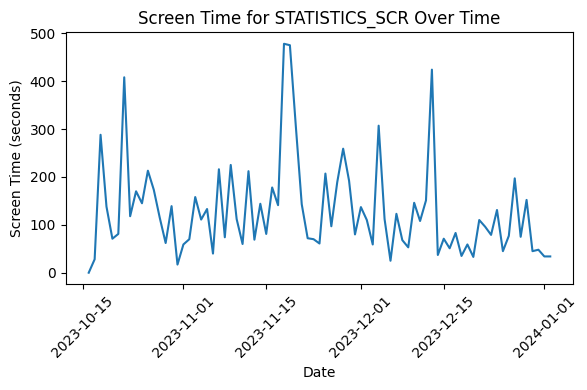

In [39]:
import matplotlib.pyplot as plt

# Get all screen names from new_df columns except for date and other non-screen columns
screen_names = [col for col in new_df.columns if col not in ['date', 'cumulative_users','daily_active_users', 'month_of_year', 'monthly_active_users', 'new_users', 'average_session_duration', 'session_frequency', 'screen_views_per_session', 'average_stickiness', 'day_of_week', 'week_number_of_month', 'week_of_month']]

# Iterate over each screen and create a line graph
for screen_name in screen_names:
    plt.figure(figsize=(6, 4))
    plt.plot(new_df['date'], new_df[screen_name])
    plt.title(f'Screen Time for {screen_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Screen Time (seconds)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
